# Simple MNIST Handwritten Digit Recognition

In this notebook we will build a Simple MNIST Handwritten Digit Recognition.


## 1 - Import all packages ##

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential



## 2 - Dataset ##

The following code will load MNIST dataset.

In [2]:
#Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to scale pixel values between 0 and 1
x_train, x_test = np.divide(x_train , 255.0), np.divide(x_test , 255.0)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## 3 - Create the vanilla model

In this step, we define the vanilla model - a neural network with architecture and optimizer that is identical to the one suggested in the videos.

* 1 Input layer: 28x28 units.
* 2 Hidden layers: 16 units per layer.
* 1 Output layer: 10 units.
* Activation function: sigmoid.

With `keras.models.Sequential`, we need to flatten the input layer because dense layers accept a 1D vector as input, but the MNIST dataset provides images in a 2D format (28x28 pixels).

I chose `sparse_categorical_crossentropy` as the loss function because our classes are mutually exclusive and we don't care at all about other close-enough predictions.

Choosing `adam` as an optimizer works well with the vast image datasets frequently used in computer vision. Moreover, it converges much more quickly than SGD by adapting the learning rate during training.

In [3]:
# Define the "vanilla" model
vanilla_model = Sequential([
    keras.Input(shape=(28, 28)),  # Input layer
    layers.Flatten(),  # Flatten the 28x28 images into a 1D array
    layers.Dense(16, activation='sigmoid'),  # Hidden layer 1 with 16 units
    layers.Dense(16, activation='sigmoid'),  # Hidden layer 2 with 16 units
    layers.Dense(10, activation='sigmoid')  # Output layer for 10 classes (digits 0-9)
])

# Compile the "vanilla" model
vanilla_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# Train the "vanilla" model
print("Training the 'vanilla' model...")
%time vanilla_history = vanilla_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=64)



Training the 'vanilla' model...
Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4303 - loss: 1.8707 - val_accuracy: 0.8299 - val_loss: 0.8489
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8475 - loss: 0.7238 - val_accuracy: 0.8894 - val_loss: 0.4643
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8958 - loss: 0.4236 - val_accuracy: 0.9103 - val_loss: 0.3380
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9158 - loss: 0.3166 - val_accuracy: 0.9221 - val_loss: 0.2860
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9266 - loss: 0.2709 - val_accuracy: 0.9286 - val_loss: 0.2567
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9317 - loss: 0.2467 - val_accuracy: 0.9324 - val_loss: 0.2369
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9361 - loss: 0.2284 - val_accuracy: 0.9367 - val_loss: 0.2221
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9420 -

## 4 - Create the "Customized" model

For the customized model, I made the following changes:
* **Increase the units of 2 hidden layers:** More neurons allow the network to learn more complex patterns in the data. It also improves feature extraction.

* **Replace Sigmoid with ReLU in Hidden Layers:** ReLU can avoid the vanishing gradient problem. Moreover, Sigmoid requires exponentiation, which leads to slower calculations. ReLU is just max(0, x), giving the model better computational efficiency.

* **Add a dropout rate:** With increased units in the two hidden layer, model may become more complex. Adding a dropout rate is to reduce overfitting and learn more generalizable features.

* **Used Softmax Instead of Sigmoid in the Output Layer**: Sigmoid treats each output neuron independently, which is not good for multi-class classification. Softmax activation ensures that the output values represent probabilities of each class.


In [4]:
# Define a custom model with additional layers and dropout to prevent overfitting
custom_model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compile the custom model
custom_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Train the custom model
print("Training the 'customized' model...")
%time custom_history = custom_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=128)


Training the 'customized' model...
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7873 - loss: 0.6853 - val_accuracy: 0.9581 - val_loss: 0.1367
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9484 - loss: 0.1701 - val_accuracy: 0.9680 - val_loss: 0.1039
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9630 - loss: 0.1212 - val_accuracy: 0.9761 - val_loss: 0.0794
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9695 - loss: 0.0980 - val_accuracy: 0.9771 - val_loss: 0.0713
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9738 - loss: 0.0850 - val_accuracy: 0.9768 - val_loss: 0.0689
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9779 - loss: 0.0702 - val_accuracy: 0.9799 - val_loss: 0.0712
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9799 - loss: 0.0671 - val_accuracy: 0.9794 - val_loss: 0.0717
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0

## 5 - Evaluate the models

After the adjustment, it can be seen that the custom model have better accuracy in both training and validation.

In my environment,the resource used in the Vanilla model is:

> *CPU times: user 31.1 s, sys: 2.14 s, total: 33.3 s
Wall time: 42.4 s*

Meanwhile, the resource used in the Custom model is
> *CPU times: user 54 s, sys: 3.82 s, total: 57.8 s
Wall time: 53.2 s*

The vanilla model is simpler in term of architecture. Therefore, it is faster in training. However, the custom model, with additional layers and dropout, is better at detecting the pattern and reducing overfitting, shown by the higher accuracy rate.

It is clear that training complexity has increased with the custom model, but it is worth the performance gains.


313/313 - 0s - 1ms/step - accuracy: 0.9435 - loss: 0.1995
313/313 - 1s - 2ms/step - accuracy: 0.9833 - loss: 0.0597
Vanilla Model Accuracy on Testing dataset: 0.9434999823570251
Custom Model Accuracy on Testing dataset: 0.983299970626831


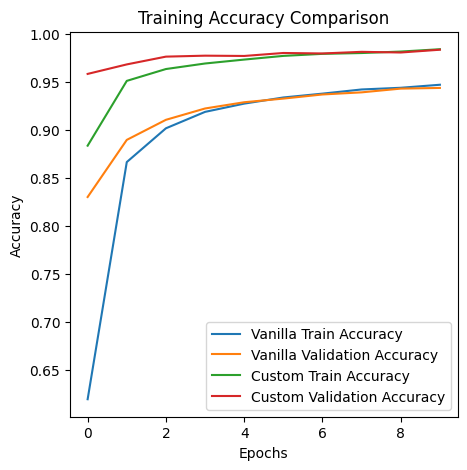

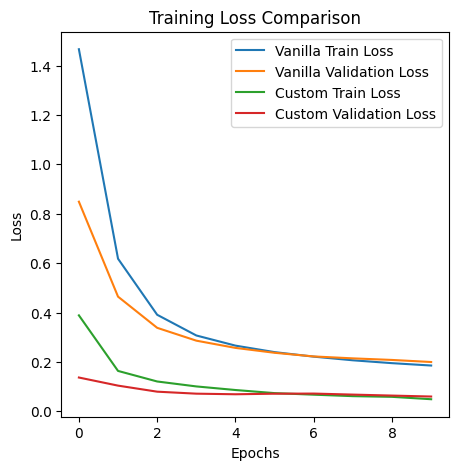

In [5]:
# Evaluate the models
vanilla_eval = vanilla_model.evaluate(x_test, y_test, verbose=2)
custom_eval = custom_model.evaluate(x_test, y_test, verbose=2)

print("Vanilla Model Accuracy on Testing dataset:", vanilla_eval[1])
print("Custom Model Accuracy on Testing dataset:", custom_eval[1])

# Plot training history for accuracy
plt.figure(figsize=(5,5))
plt.plot(vanilla_history.history['accuracy'], label='Vanilla Train Accuracy')
plt.plot(vanilla_history.history['val_accuracy'], label='Vanilla Validation Accuracy')
plt.plot(custom_history.history['accuracy'], label='Custom Train Accuracy')
plt.plot(custom_history.history['val_accuracy'], label='Custom Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Comparison')
plt.legend()
plt.show()

# Plot training history for loss
plt.figure(figsize=(5,5))
plt.plot(vanilla_history.history['loss'], label='Vanilla Train Loss')
plt.plot(vanilla_history.history['val_loss'], label='Vanilla Validation Loss')
plt.plot(custom_history.history['loss'], label='Custom Train Loss')
plt.plot(custom_history.history['val_loss'], label='Custom Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()
plt.show()